Intrinsic Matrix (K):
[[800.   0. 320.   0.]
 [  0. 700. 240.   0.]
 [  0.   0.   1.   0.]]

Extrinsic Matrix [R|t]:
[[-0.99467026 -0.08885585  0.05230407  1.53940331]
 [-0.08710265  0.99558784  0.0348995  -2.23576435]
 [-0.05517433  0.03015767 -0.9980212  12.02628767]
 [ 0.          0.          0.          1.        ]]

Camera Projection Matrix (P):
[[-813.39199048  -61.43422386 -277.52352325 5079.93470764]
 [ -74.21369291  704.14933053 -215.0954395  1321.27399874]
 [  -0.05517433    0.03015767   -0.9980212    12.02628767]]


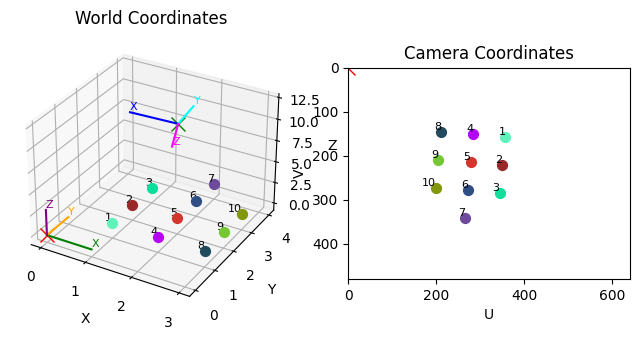

In [8]:
#Dr. Adeel Muimtaz
#Camera forward projection (world to camera Demo!)
#ACV Course, Spring 2024

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#from scipy.linalg import svd
#from scipy.linalg import rq
np.set_printoptions(suppress=True)
def create_rotation_matrix(yaw, pitch, roll):
    # Convert angles to radians
    yaw = np.radians(yaw)
    pitch = np.radians(pitch)
    roll = np.radians(roll)
    # Yaw matrix around Y axis
    R_yaw = np.array([
        [np.cos(yaw), 0, np.sin(yaw)],
        [0, 1, 0],
        [-np.sin(yaw), 0, np.cos(yaw)]
    ])
    # Pitch matrix around X axis
    R_pitch = np.array([
        [1, 0, 0],
        [0, np.cos(pitch), -np.sin(pitch)],
        [0, np.sin(pitch), np.cos(pitch)]
    ])

    # Roll matrix around Z axis
    R_roll = np.array([
        [np.cos(roll), -np.sin(roll), 0],
        [np.sin(roll), np.cos(roll), 0],
        [0, 0, 1]
    ])
    # Combine the matrices by multiplying them
    R_combined = R_roll.dot(R_pitch).dot(R_yaw)
    return R_combined


def createGTCameraParameters(focal_length_x,focal_length_y,principal_point_x,principal_point_y,R,camera_translation_vector_from_world_origin):

    #construction of a 4 by 4 Mext
    extrinsic_matrix = np.eye(4) #4 by 4
    extrinsic_matrix[:3, :3] = R  # Transpose of the rotation matrix
    extrinsic_matrix[:3, 3] = -R @ camera_translation_vector_from_world_origin  # Translation in camera coordinates

    # Intrinsic matrix (3 by 4)
    K = np.array([[focal_length_x, 0, principal_point_x,0],
                [0, focal_length_y, principal_point_y,0],
                [0, 0, 1,0]])

    # Camera projection matrix P (3 by 4)
    P = np.dot(K, extrinsic_matrix)

    print("Intrinsic Matrix (K):")
    print(K)
    print("\nExtrinsic Matrix [R|t]:")
    print(extrinsic_matrix)
    print("\nCamera Projection Matrix (P):")
    print(P)

    return P,extrinsic_matrix,K

# Function to project 3D points to 2D image coordinates
def project_world_to_camera(points_3d, P):
    # Add homogeneous coordinate (1) to the 3D points
    points_3d_homogeneous = np.column_stack((points_3d, np.ones((points_3d.shape[0], 1))))

    # Project 3D points to 2D image coordinates
    points_2d_homogeneous = np.dot(P, points_3d_homogeneous.T).T

    # Normalize homogeneous coordinates
    points_2d_normalized = points_2d_homogeneous[:, :2] / points_2d_homogeneous[:, 2:]

    # Check if points are within image boundaries
    points_inside_frame = np.logical_and.reduce((points_2d_normalized[:, 0] >= 0,
                                              points_2d_normalized[:, 0] <= 640,  # Adjust for image width
                                              points_2d_normalized[:, 1] >= 0,
                                              points_2d_normalized[:, 1] <= 480))  # Adjust for image height

    return points_2d_normalized,points_inside_frame


def plotWorldPoints(ax,points,rotation_matrix,camera_origin):

    num_points = len(points)





    # Plot the random points with numbers
    for i in range(num_points,):
        ax.text(points[i, 0], points[i, 1], points[i, 2], str(i+1), color='black', fontsize=8, ha='right', va='bottom')
        ax.scatter(points[i, 0], points[i, 1], points[i, 2], c=[colors[i]], marker='o', s=50)

    # Plot a red cross at the origin
    ax.plot([0], [0], [0], marker='x', markersize=10, color='red')


     # Plot world coordinate axes
    world_axes_length = 1.0
    world_x_axis = np.array([world_axes_length, 0, 0])
    world_y_axis = np.array([0, world_axes_length, 0])
    world_z_axis = np.array([0, 0, 3])

    ax.plot([0, world_x_axis[0]], [0, world_x_axis[1]], [0, world_x_axis[2]], color='green')
    ax.plot([0, world_y_axis[0]], [0, world_y_axis[1]], [0, world_y_axis[2]], color='orange')
    ax.plot([0, world_z_axis[0]], [0, world_z_axis[1]], [0, world_z_axis[2]], color='purple')

    # Add labels 'X', 'Y', and 'Z' at the top of each world axis line
    ax.text(world_x_axis[0], world_x_axis[1], world_x_axis[2], 'X', color='green', fontsize=8, ha='left', va='bottom')
    ax.text(world_y_axis[0], world_y_axis[1], world_y_axis[2], 'Y', color='orange', fontsize=8, ha='left', va='bottom')
    ax.text(world_z_axis[0], world_z_axis[1], world_z_axis[2], 'Z', color='purple', fontsize=8, ha='left', va='bottom')


    # Plot a green cross at the camera origin

    ax.plot([camera_origin[0]], [camera_origin[1]], [camera_origin[2]], marker='x', markersize=10, color='green')

    # Plot camera coordinate axes
    camera_axes_length = 1.0
    camera_x_axis = rotation_matrix[:, 0] * camera_axes_length + camera_origin
    camera_y_axis = rotation_matrix[:, 1] * camera_axes_length + camera_origin
    camera_z_axis = rotation_matrix[:, 2] * 3 + camera_origin

    ax.plot([camera_origin[0], camera_x_axis[0]], [camera_origin[1], camera_x_axis[1]], [camera_origin[2], camera_x_axis[2]], color='blue')
    ax.plot([camera_origin[0], camera_y_axis[0]], [camera_origin[1], camera_y_axis[1]], [camera_origin[2], camera_y_axis[2]], color='cyan')
    ax.plot([camera_origin[0], camera_z_axis[0]], [camera_origin[1], camera_z_axis[1]], [camera_origin[2], camera_z_axis[2]], color='magenta')

    # Add labels 'X', 'Y', and 'Z' at the top of each line
    ax.text(camera_x_axis[0], camera_x_axis[1], camera_x_axis[2], 'X', color='blue', fontsize=8, ha='left', va='bottom')
    ax.text(camera_y_axis[0], camera_y_axis[1], camera_y_axis[2], 'Y', color='cyan', fontsize=8, ha='left', va='bottom')
    ax.text(camera_z_axis[0], camera_z_axis[1], camera_z_axis[2], 'Z', color='magenta', fontsize=8, ha='left', va='bottom')


    # Add grid lines
    ax.grid(True)

    # Set equal scaling to make the plot cubic
    #ax.set_box_aspect([np.ptp(axis) for axis in [ax.get_xlim(), ax.get_ylim(), ax.get_zlim()]])


    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('World Coordinates')






def plotImagePixelPoints(ax,image_points,image_width,image_height):
    num_points = len(image_points)

    # Create a 2D image and plot the projected points
    #fig, ax = plt.subplots()


    ax.set_aspect('equal')

    # Invert y-coordinates to have the origin at the top-left
    image_points[:, 1] = -image_points[:, 1]

    # Plot the red cross at the origin
    ax.plot([0], [0], marker='x', markersize=10, color='red')

    # Plot the projected points with numbers and colors
    for i in range(num_points):
        #ax.text(image_points[i, 0], image_points[i, 1], str(i + 1), color='black', fontsize=8, ha='right', va='bottom')
        #ax.scatter(image_points[i, 0], image_points[i, 1], c=[colors[i]], marker='o', s=50)

        ax.text(image_points[i, 0], image_points[i, 1], str(i + 1), color='black', fontsize=8, ha='right', va='bottom')
        ax.scatter(image_points[i, 0], image_points[i, 1], c=[colors[i]], marker='o', s=50)

    # Set labels
    ax.set_xlabel('U')
    ax.set_ylabel('V')


     # Customize tick labels to remove the minus sign
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:0.0f}'.format(abs(x))))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:0.0f}'.format(abs(y))))

    # Set limits based on the image size
    ax.set_xlim(0, image_width)
    ax.set_ylim(-image_height,0)  # Inverted y-axis

    ax.set_title('Camera Coordinates')

    # Show the plot


np.random.seed(42)  # for reproducibility

# GT Intrinsic parameters (example values) (#in pixels)
focal_length_x = 800.0
focal_length_y = 700.0
principal_point_x = 320.0
principal_point_y = 240.0
image_width=640
image_height=480
# GT Extrinsic parameters (example values) (#in degree and meters)
camera_yaw = 3 #rotation around Y axis
camera_pitch = 2 #rotation around X axis
camera_roll = 5 #rotation around Z axis
camera_translation_vector_from_world_origin=np.array([2,2,12])  #C translation of camera wrt world (in meters)


camera_rotation_matrix= create_rotation_matrix(camera_yaw, camera_pitch, camera_roll)
#Need to invert X and Z axis to create a forward, right and bottom system to properly project
camera_rotation_matrix[:,0]=-camera_rotation_matrix[:,0]
camera_rotation_matrix[:,2]=-camera_rotation_matrix[:,2]
R=camera_rotation_matrix.T  #for world to camera we need to take inverse of camera rotation


# Hardcoded list of points on the XY plane (just for rendering purpose)
world_3D_points = np.array([[1.0, 1.0, 1.0],
                            [1.0, 2.0, 1.0],
                            [1.0, 3.0, 1.0],
                            [2.0, 1.0, 1.0],
                            [2.0, 2.0, 1.0],
                            [2.0, 3.0, 1.0],
                            [2.0, 4.0, 1.0],
                            [3.0, 1.0, 1.0],
                            [3.0, 2.0, 1.0],
                            [3.0, 3.0, 1.0]], dtype=np.float32)

num_points=len(world_3D_points)
# Assign different colors to each point
colors = np.random.rand(num_points, 3)

#ground truth camera projection matrix
P,RT,K=createGTCameraParameters(focal_length_x,focal_length_y,principal_point_x,principal_point_y,R,camera_translation_vector_from_world_origin)


# Project 3D points to 2D image coordinates
camera_pixel_2D_points,insideViewOrNot = project_world_to_camera(world_3D_points, P)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')  # 1st subplot is 3D
ax2 = fig.add_subplot(122)

#plot 3D points and camera and world axis
plotWorldPoints(ax1,world_3D_points,camera_rotation_matrix,camera_translation_vector_from_world_origin)
#plot 2D points in pixel frame
plotImagePixelPoints(ax2,camera_pixel_2D_points,image_width,image_height)

plt.show(block=True)

In [6]:
def find_projection_matrix(world_points, image_points):
    num_points = len(world_points)

    A = np.zeros((2 * num_points, 12))

    for i in range(num_points):
        X, Y, Z = world_points[i]
        u, v = image_points[i]

        A[2*i, :] = [-X, -Y, -Z, -1, 0, 0, 0, 0, u*X, u*Y, u*Z, u]
        A[2*i + 1, :] = [0, 0, 0, 0, -X, -Y, -Z, -1, v*X, v*Y, v*Z, v]

    _, _, V = np.linalg.svd(A)

    P_estimated = V[-1, :].reshape((3, 4))

    P_estimated /= P_estimated[2, 3]

    return P_estimated

def decompose_projection_matrix(P_estimated):

    R, K_inv = np.linalg.qr(np.linalg.inv(P_estimated[:, :3]))

    R_estimated = R.T

    t_estimated = np.linalg.inv(K_inv) @ P_estimated[:, 3]

    K_estimated_inv = np.linalg.inv(K_inv)
    fx = 1 / K_estimated_inv[0, 0]
    fy = 1 / K_estimated_inv[1, 1]
    cx = K_estimated_inv[0, 2]
    cy = K_estimated_inv[1, 2]

    return fx, fy, cx, cy, R_estimated, t_estimated, -R[:, 2]



def project_with_estimated_matrix(world_points, P_estimated):

    P_estimated[:, 0] = -P_estimated[:, 0]
    P_estimated[:, 2] = -P_estimated[:, 2]

    camera_pixel_2D_points_estimated, _ = project_world_to_camera(world_points, P_estimated)

    return camera_pixel_2D_points_estimated


def compute_average_projection_error(original_points, estimated_points):
    num_points = len(original_points)
    errors = np.linalg.norm(original_points - estimated_points, axis=1)
    average_error = np.mean(errors)

    return average_error


In [7]:

P_estimated = find_projection_matrix(world_3D_points, camera_pixel_2D_points)

print("\nGround Truth Projection Matrix (P):")
print(P)
print("\nEstimated Projection Matrix (P_estimated):")
print(P_estimated)

fx, fy, cx, cy, R_estimated, t_estimated, C_estimated = decompose_projection_matrix(P_estimated)

print("\nGround Truth Intrinsic Matrix (K):")
print(K)
print("\nGround Truth Extrinsic Matrix [R|t]:")
print(RT)
print("\nEstimated Intrinsic Matrix (K_estimated):")
print(np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]]))
print("\nEstimated Extrinsic Matrix [R_estimated|t_estimated]:")
print(np.hstack((R_estimated, t_estimated.reshape(-1, 1))))

camera_pixel_2D_points_estimated = project_with_estimated_matrix(world_3D_points, P_estimated)

average_error = compute_average_projection_error(camera_pixel_2D_points, camera_pixel_2D_points_estimated)
print("\nAverage Projection Error:", average_error)



Ground Truth Projection Matrix (P):
[[-800.    0. -320. 5440.]
 [   0.  700. -240. 1480.]
 [   0.    0.   -1.   12.]]

Estimated Projection Matrix (P_estimated):
[[ 0.00012815  0.          0.00006266 -0.00088281]
 [ 0.          0.00011213  0.02614348 -0.02594485]
 [-0.         -0.         -1.00000176  1.        ]]

Ground Truth Intrinsic Matrix (K):
[[800.   0. 320.   0.]
 [  0. 700. 240.   0.]
 [  0.   0.   1.   0.]]

Ground Truth Extrinsic Matrix [R|t]:
[[-1. -0. -0.  2.]
 [ 0.  1.  0. -2.]
 [-0. -0. -1. 12.]
 [ 0.  0.  0.  1.]]

Estimated Intrinsic Matrix (K_estimated):
[[-7803.43317461     0.             0.00006266]
 [    0.         -8918.20934242     0.02614348]
 [    0.             0.             1.        ]]

Estimated Extrinsic Matrix [R_estimated|t_estimated]:
[[-1.          0.          0.          0.00006277]
 [-0.         -1.          0.          0.02614639]
 [ 0.          0.          1.         -1.00000176]]

Average Projection Error: 412.0563621485044
